In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import stats
import folium
import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.set_option('display.max_column', None)

In [85]:
# Reading the CSV file 'accident_data.csv' into a pandas DataFrame named 'data'
data = pd.read_csv('data/accident_data.csv')

In [86]:
# Display top 5 rows 
data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,04/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,NaN,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,NaN,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,07/01/2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,NaN,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,NaN,0.0,NaN,0.0,Slight,NaN,10/01/2005,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,21:13,Urban,Fine no high winds,2005,No


In [87]:
data.info()
# Displaying information about the DataFrame 'data'
# This includes the index dtype and column dtypes, non-null values, and memory usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1048575 non-null  object 
 1   1st_Road_Class                               742986 non-null   object 
 2   1st_Road_Number                              1048573 non-null  float64
 3   2nd_Road_Class                               608751 non-null   object 
 4   2nd_Road_Number                              1037772 non-null  float64
 5   Accident_Severity                            1048575 non-null  object 
 6   Carriageway_Hazards                          19712 non-null    object 
 7   Date                                         1048575 non-null  object 
 8   Day_of_Week                                  1048575 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

In [5]:
data.describe()
# Generating summary statistics of the DataFrame 'data'
# This includes count, mean, standard deviation, minimum, 25th percentile, median (50th percentile),
# 75th percentile, and maximum values for numerical columns


,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year
count,1.048573e+06,1.037772e+06,1.048306e+06,1.048464e+06,1.048464e+06,1.048464e+06,1.048463e+06,1.048575e+06,1.048575e+06,1.048554e+06,1.048538e+06,1.048575e+06,1.048575e+06
mean,1.011997e+03,3.870004e+02,1.198669e+00,5.257297e+01,4.383077e+05,2.983130e+05,-1.454537e+00,1.359930e+00,1.835030e+00,9.291844e-03,6.793955e-01,3.943654e+01,2.007328e+03
std,1.832042e+03,1.316673e+03,4.062626e-01,1.424463e+00,9.479292e+04,1.581757e+05,1.391890e+00,8.223645e-01,7.181454e-01,1.267232e-01,1.749380e+00,1.431206e+01,1.690220e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,4.991443e+01,6.495000e+04,1.052000e+04,-7.516225e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,2.005000e+03
25%,0.000000e+00,0.000000e+00,1.000000e+00,5.149244e+01,3.752200e+05,1.784700e+05,-2.371331e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.006000e+03
50%,1.250000e+02,0.000000e+00,1.000000e+00,5.234314e+01,4.377000e+05,2.729300e+05,-1.435624e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.007000e+03
75%,7.060000e+02,0.000000e+00,1.000000e+00,5.346407e+01,5.211600e+05,3.965500e+05,-2.446045e-01,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,5.000000e+01,2.009000e+03
max,9.999000e+03,9.999000e+03,3.000000e+00,6.075754e+01,6.555400e+05,1.208800e+06,1.762010e+00,6.800000e+01,3.200000e+01,2.000000e+00,8.000000e+00,7.000000e+01,2.010000e+03


In [6]:
data.describe(include='object')
# Generating summary statistics of categorical (non-numeric) columns in the DataFrame 'data'
# This includes count, unique, top (most frequent), and frequency of the top value for each categorical column


,Accident_Index,1st_Road_Class,2nd_Road_Class,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),LSOA_of_Accident_Location,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Time,Urban_or_Rural_Area,Weather_Conditions,InScotland
count,1048575,742986,608751,1048575,19712,1048575,1048575,1048575,1048575,1046491,1048575,1048575,976685,1048575,1047386,1041309,27024,1048475,1048490,1027183,1048532
unique,671340,5,6,3,5,2191,7,7,10,5,422,212,34226,51,5,5,9,1439,3,8,2
top,2.00513E+12,A,Unclassified,Slight,Other object on road,21/10/2005,Friday,Give way or uncontrolled,Not at junction or within 20 metres,Daylight,Birmingham,Kent,E01000004,Metropolitan Police,Dry,Single carriageway,Roadworks,17:00,Urban,Fine no high winds,No
freq,7277,470854,411064,895883,8975,822,171910,502984,429428,764036,21384,27743,1733,143507,712370,780659,12873,10036,667882,831083,985871


In [7]:
data.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

1) Accident Frequency and Severity Analysis:

        How many accidents occurred each year?

        What is the distribution of accident severity (slight, serious, fatal) over the years?
        
        How does accident severity vary by road class and road type?

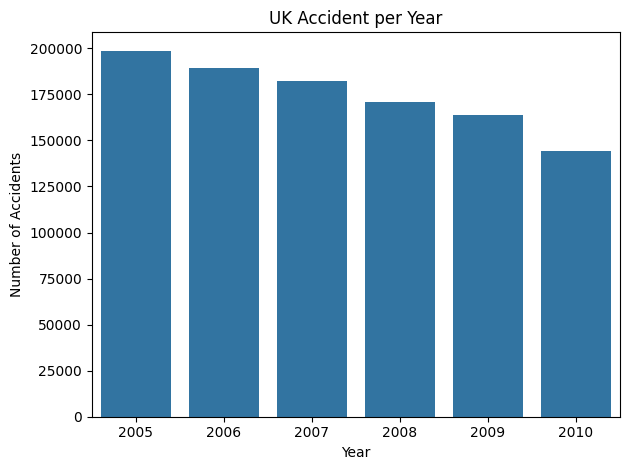

In [9]:
# Counting the occurrences of each unique year in the 'Year' column and resetting index to create a DataFrame
year = data['Year'].value_counts().reset_index()

# Creating a bar plot using seaborn's barplot function
sns.barplot(x='Year', y='count', data=year)
# 'x' specifies the data for the x-axis, which is the 'Year' column
# 'y' specifies the data for the y-axis, which is the count of accidents
# 'data' specifies the DataFrame containing the data
# 'year' is the DataFrame created earlier, containing counts of accidents per year

# Adding a title to the plot
plt.title('UK Accident per Year')

# Labeling the y-axis
plt.ylabel("Number of Accidents")

# Labeling the x-axis
plt.xlabel('Year')

# Adjusting layout to prevent clipping of titles and labels
plt.tight_layout()


In [10]:
df_tem = data.groupby(['Year', 'Accident_Severity']).size().reset_index(name= 'Count')

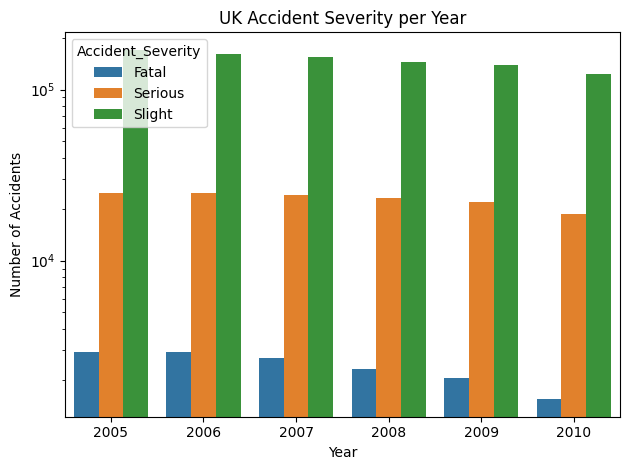

In [88]:
# Grouping the data by 'Year' and 'Accident_Severity', and counting the occurrences of each combination
df_tem = data.groupby(['Year', 'Accident_Severity']).size().reset_index(name='Count')

# Creating a bar plot using seaborn's barplot function
sns.barplot(x='Year', y='Count', hue='Accident_Severity', data=df_tem)
# 'x' specifies the data for the x-axis, which is the 'Year' column
# 'y' specifies the data for the y-axis, which is the count of accidents
# 'hue' specifies the variable to group the data by, which is 'Accident_Severity'
# 'data' specifies the DataFrame containing the data
# 'df_tem' is the DataFrame created earlier, containing counts of accidents per year and severity

# Adding a title to the plot
plt.title('UK Accident Severity per Year')

# Labeling the y-axis
plt.ylabel("Number of Accidents")

# Scaling the y-axis to logarithmic scale for better visualization of data distribution
plt.yscale('log')

# Labeling the x-axis
plt.xlabel('Year')

# Adjusting layout to prevent clipping of titles and labels
plt.tight_layout()


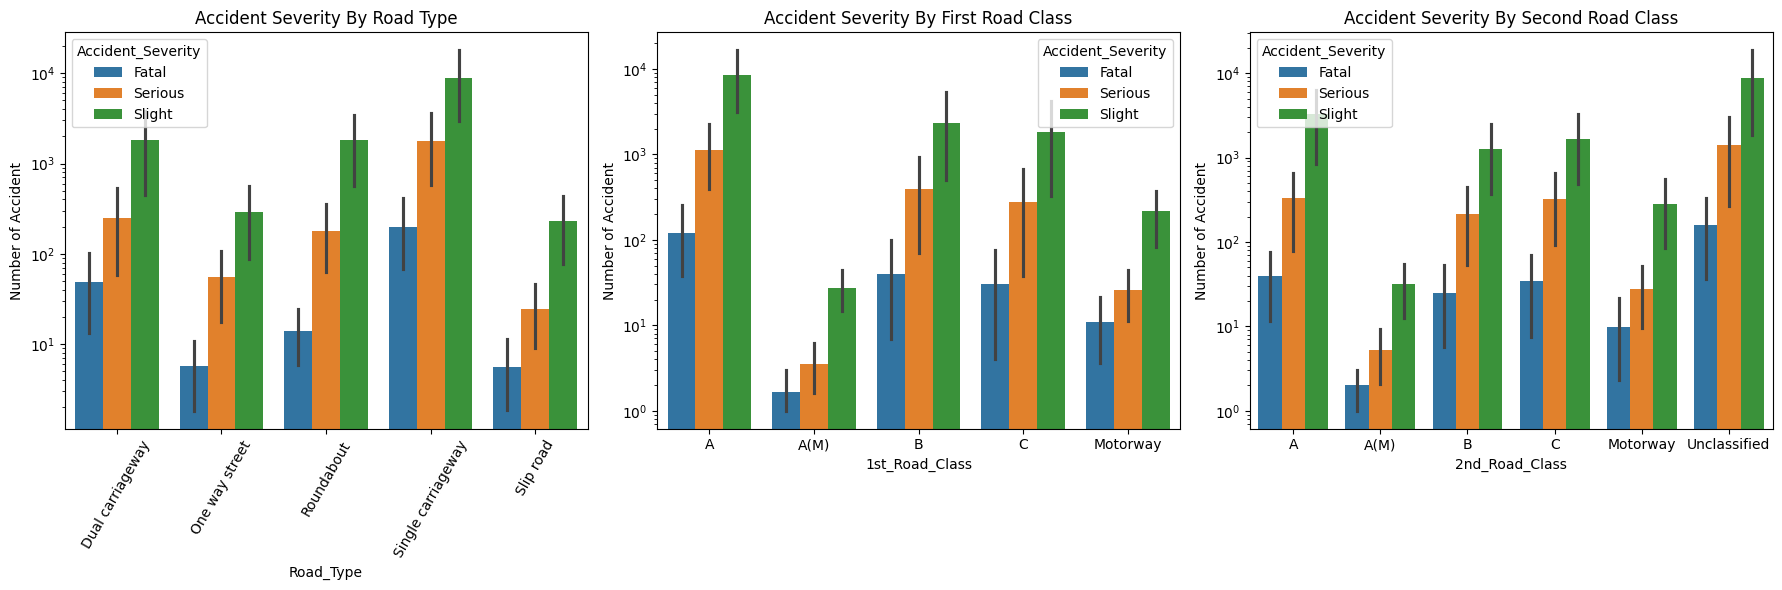

In [13]:
# Grouping the data by 'Road_Type', '1st_Road_Class', '2nd_Road_Class', and 'Accident_Severity', 
# and counting the occurrences of each combination
df_temp = data.groupby(['Road_Type', '1st_Road_Class', '2nd_Road_Class', 'Accident_Severity']).size().reset_index(name='Count')

# Creating subplots with 1 row and 3 columns, with a specified figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Creating the first subplot for 'Road_Type'
sns.barplot(x='Road_Type', y='Count', hue='Accident_Severity', data=df_temp, ax=axes[0])
axes[0].set_title("Accident Severity By Road Type")  # Setting subplot title
axes[0].set_yscale('log')  # Setting y-axis scale to logarithmic for better visualization
axes[0].tick_params(axis='x', rotation=60)  # Rotating x-axis labels for better readability
axes[0].set_ylabel('Number of Accidents')  # Labeling the y-axis

# Creating the second subplot for '1st_Road_Class'
sns.barplot(x='1st_Road_Class', y='Count', hue='Accident_Severity', data=df_temp, ax=axes[1])
axes[1].set_title("Accident Severity By First Road Class")  # Setting subplot title
axes[1].set_yscale('log')  # Setting y-axis scale to logarithmic for better visualization
axes[1].set_ylabel('Number of Accidents')  # Labeling the y-axis

# Creating the third subplot for '2nd_Road_Class'
sns.barplot(x='2nd_Road_Class', y='Count', hue='Accident_Severity', data=df_temp, ax=axes[2])
axes[2].set_title("Accident Severity By Second Road Class")  # Setting subplot title
axes[2].set_yscale('log')  # Setting y-axis scale to logarithmic for better visualization
axes[2].set_ylabel('Number of Accidents')  # Labeling the y-axis

# Adjusting layout to prevent overlapping of subplots
plt.tight_layout()


2. Temporal Analysis:

        What days of the week and times of day have the highest frequency of accidents?

        Are there any trends or seasonal patterns in accident occurrences?

In [14]:
data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,04/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,NaN,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,NaN,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,07/01/2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,NaN,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,NaN,0.0,NaN,0.0,Slight,NaN,10/01/2005,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,21:13,Urban,Fine no high winds,2005,No


In [16]:
# Grouping the data by 'Day_of_Week' and counting the occurrences of each day
day_temp = data.groupby(['Day_of_Week']).size().reset_index(name='Count')

# Grouping the data by 'Time' and counting the occurrences of each time
time_temp = data.groupby(['Time']).size().reset_index(name='Count')

# Converting the 'Time' column to datetime format
time_temp['Time'] = pd.to_datetime(time_temp['Time'])

# Setting the 'Time' column as the index
time_temp.set_index("Time", inplace=True)

# Resampling the time data to average counts over 4-hour intervals
time_temp_sample = time_temp.resample('4H').mean().reset_index()

# Converting the 'Time' column back to datetime format
time_temp_sample['Time'] = pd.to_datetime(time_temp_sample['Time'], format='%H:%M:%S')


/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_95720/1450942110.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_temp['Time'] = pd.to_datetime(time_temp['Time'])
/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_95720/1450942110.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_temp_sample = time_temp.resample('4H').mean().reset_index()


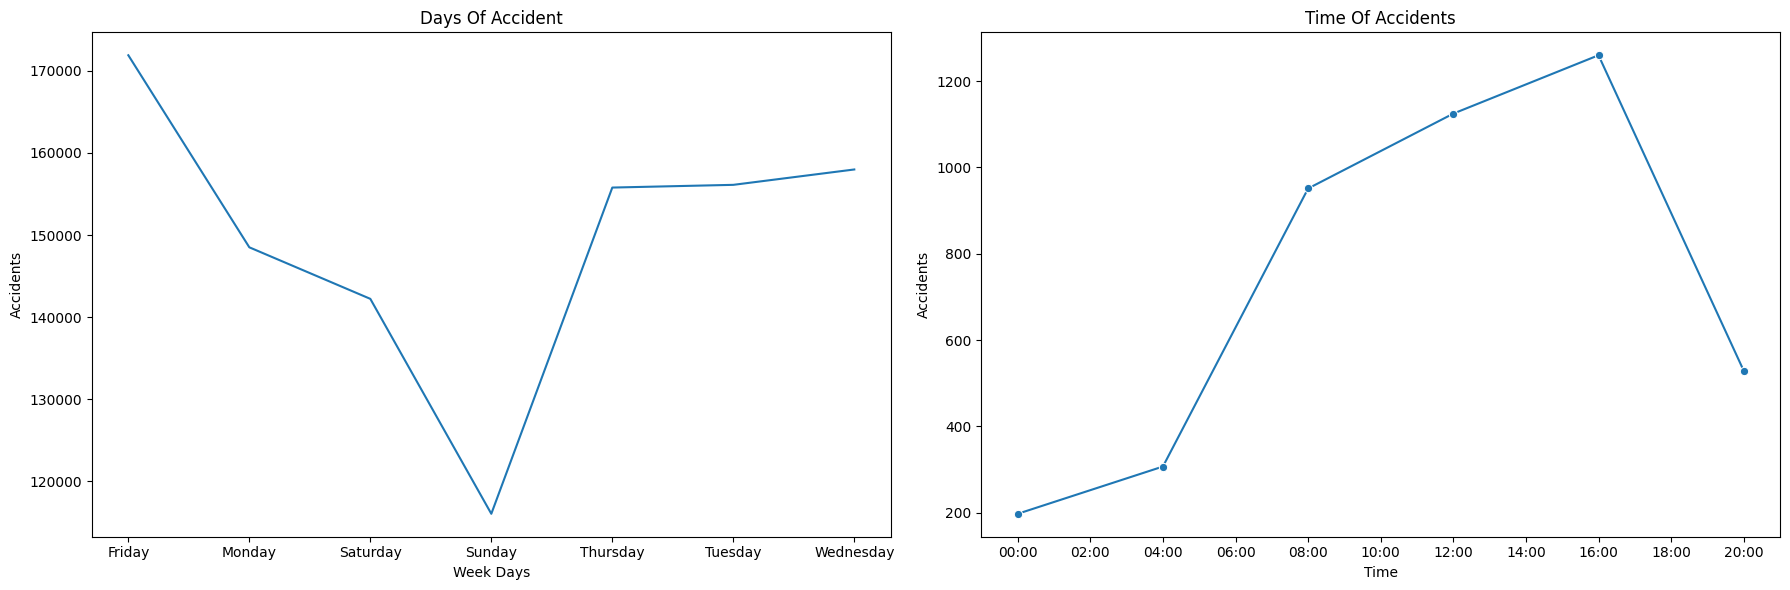

In [17]:
# Creating subplots with 1 row and 2 columns, with a specified figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Creating the first subplot for 'Day_of_Week'
sns.lineplot(x='Day_of_Week', y='Count', data=day_temp, ax=axes[0])
axes[0].set_title("Days Of Accident")  # Setting subplot title
axes[0].set_ylabel("Accidents")  # Labeling the y-axis
axes[0].set_xlabel('Week Days')  # Labeling the x-axis

# Creating the second subplot for 'Time'
sns.lineplot(x='Time', y='Count', data=time_temp_sample, ax=axes[1], marker='o')
axes[1].set_title("Time Of Accidents")  # Setting subplot title
# Formatting x-axis labels to display only hours and minutes
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
axes[1].set_ylabel("Accidents")  # Labeling the y-axis

# Adjusting layout to prevent overlapping of subplots
plt.tight_layout()


1. Geographical Analysis:

        Which locations (using Latitude and Longitude) have the highest concentration of accidents?

        How does accident frequency vary by local authority district or highway?

In [18]:
data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,04/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,NaN,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,NaN,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,07/01/2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,NaN,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,NaN,0.0,NaN,0.0,Slight,NaN,10/01/2005,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,21:13,Urban,Fine no high winds,2005,No


In [90]:
# Grouping the data by latitude and longitude, and counting the occurrences of each location
geo = data.groupby(['Latitude', "Longitude"]).size().reset_index(name='Accident').sort_values(by='Accident', ascending=False)

# Filtering locations with more than 10 accidents
geo1 = geo[geo['Accident'] > 10]

# Calculating the mean latitude and longitude of filtered locations
mean_lat = geo1['Latitude'].mean()
mean_lon = geo1['Longitude'].mean()

# Creating a Folium map centered at the mean latitude and longitude, with a zoom level of 10
geo_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)

# Iterating over each location in the filtered DataFrame and adding a circle marker to the map
for lat, lon, accident in zip(geo1['Latitude'], geo1['Longitude'], geo1['Accident']):
    folium.CircleMarker(
        [lat, lon],  # Coordinates of the location
        radius=accident / 10,  # Adjusting marker size based on the number of accidents
        color='red' if accident > 40 else 'orange' if accident > 20 else 'green',  # Coloring markers based on accident count
        fill=True,
        fill_opacity=0.8
    ).add_to(geo_map)

# Displaying the map
geo_map


1.  Environmental Conditions:

        How do light conditions, weather conditions, and road surface conditions impact accident severity?
        
        Is there a correlation between speed limits and accident severity?

In [23]:
data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,04/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,NaN,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,NaN,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,07/01/2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,NaN,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,NaN,0.0,NaN,0.0,Slight,NaN,10/01/2005,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,21:13,Urban,Fine no high winds,2005,No


In [24]:
cond = data.groupby(['Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Accident_Severity']).size().reset_index(name= 'count')

/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_95720/1321900496.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=60)  # Rotating x-axis labels for better readability
/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_95720/1321900496.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=60)  # Rotating x-axis labels for better readability
/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_95720/1321900496.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=60)  # Rotating x-axis labels for better readability


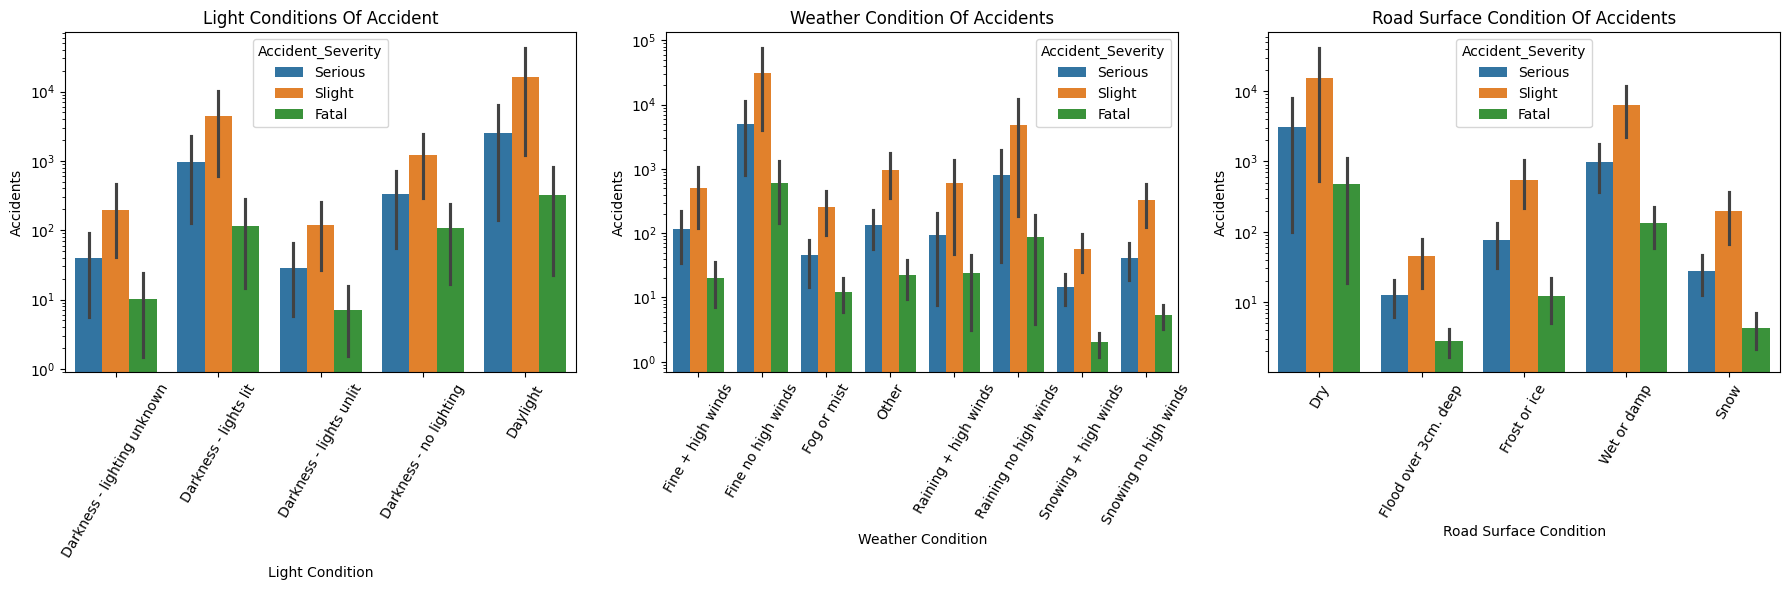

In [92]:
# Grouping the data by 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', and 'Accident_Severity', 
# and counting the occurrences of each combination
cond = data.groupby(['Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Accident_Severity']).size().\
    reset_index(name='count')

# Creating subplots with 1 row and 3 columns, with a specified figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Creating the first subplot for 'Light_Conditions'
sns.barplot(x='Light_Conditions', y='count', data=cond, ax=axes[0], hue='Accident_Severity')
axes[0].set_title("Light Conditions Of Accident")  # Setting subplot title
axes[0].set_yscale('log')  # Setting y-axis scale to logarithmic for better visualization
axes[0].set_ylabel("Accidents")  # Labeling the y-axis
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=60)  # Rotating x-axis labels for better readability
axes[0].set_xlabel('Light Condition')  # Labeling the x-axis

# Creating the second subplot for 'Weather_Conditions'
sns.barplot(x='Weather_Conditions', y='count', data=cond, ax=axes[1], hue='Accident_Severity')
axes[1].set_title("Weather Condition Of Accidents")  # Setting subplot title
axes[1].set_yscale('log')  # Setting y-axis scale to logarithmic for better visualization
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=60)  # Rotating x-axis labels for better readability
axes[1].set_ylabel("Accidents")  # Labeling the y-axis
axes[1].set_xlabel('Weather Condition')  # Labeling the x-axis

# Creating the third subplot for 'Road_Surface_Conditions'
sns.barplot(x='Road_Surface_Conditions', y='count', data=cond, ax=axes[2], hue='Accident_Severity')
axes[2].set_title("Road Surface Condition Of Accidents")  # Setting subplot title
axes[2].set_yscale('log')  # Setting y-axis scale to logarithmic for better visualization
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=60)  # Rotating x-axis labels for better readability
axes[2].set_ylabel("Accidents")  # Labeling the y-axis
axes[2].set_xlabel('Road Surface Condition')  # Labeling the x-axis

# Adjusting layout to prevent overlapping of subplots
plt.tight_layout()


1.  Human Factors:

        What is the distribution of accidents based on whether a police officer attended the scene?
        
        How do pedestrian crossing controls and facilities affect the number of casualties and severity?

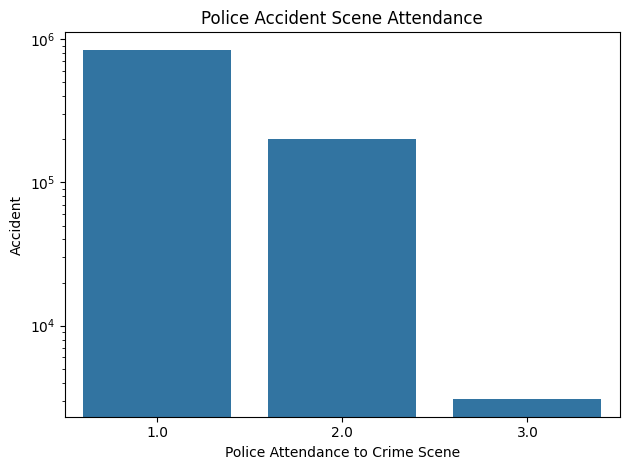

In [28]:
# Counting the occurrences of each unique value in the 'Did_Police_Officer_Attend_Scene_of_Accident' column
police = data['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts().reset_index(name='count')

# Creating a bar plot using seaborn's barplot function
sns.barplot(x='Did_Police_Officer_Attend_Scene_of_Accident', y='count', data=police)
# 'x' specifies the data for the x-axis, which is the 'Did_Police_Officer_Attend_Scene_of_Accident' column
# 'y' specifies the data for the y-axis, which is the count of accidents
# 'data' specifies the DataFrame containing the data
# 'police' is the DataFrame created earlier, containing counts of police attendance at accident scenes

# Adding a title to the plot
plt.title('Police Accident Scene Attendance')

# Labeling the y-axis
plt.ylabel('Accidents')

# Labeling the x-axis
plt.xlabel('Police Attendance to Crime Scene')

# Scaling the y-axis to logarithmic scale for better visualization of data distribution
plt.yscale('log')

# Adjusting layout to prevent clipping of titles and labels
plt.tight_layout()


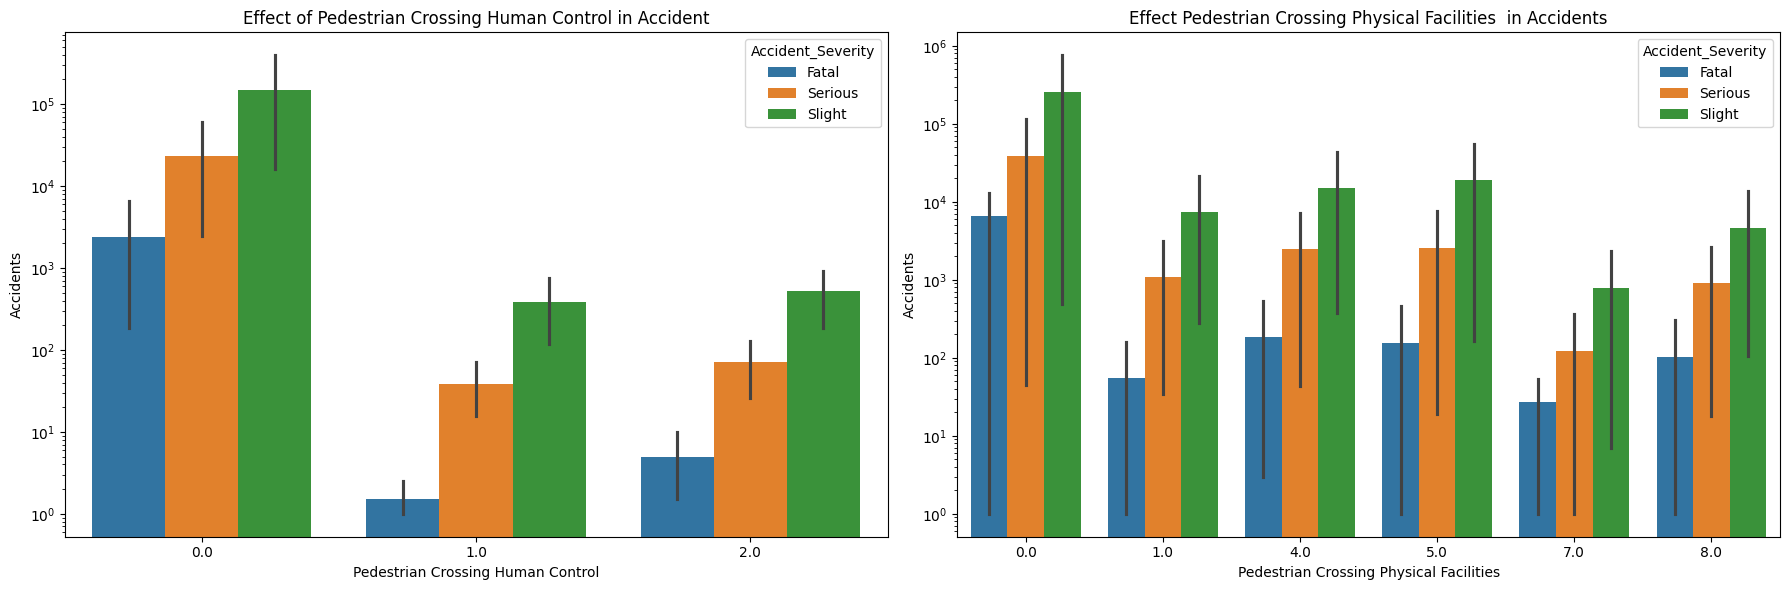

In [30]:
# Grouping the data by 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
# and 'Accident_Severity', and counting the occurrences of each combination
ped = data.groupby(['Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Accident_Severity']).size().reset_index(name='Count')

# Creating subplots with 1 row and 2 columns, with a specified figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Creating the first subplot for 'Pedestrian_Crossing-Human_Control'
sns.barplot(x='Pedestrian_Crossing-Human_Control', y='Count', data=ped, ax=axes[0], hue='Accident_Severity')
axes[0].set_title("Effect of Pedestrian Crossing Human Control in Accident")  # Setting subplot title
axes[0].set_yscale('log')  # Setting y-axis scale to logarithmic for better visualization
axes[0].set_ylabel("Accidents")  # Labeling the y-axis
axes[0].set_xlabel('Pedestrian Crossing Human Control')  # Labeling the x-axis

# Creating the second subplot for 'Pedestrian_Crossing-Physical_Facilities'
sns.barplot(x='Pedestrian_Crossing-Physical_Facilities', y='Count', data=ped, ax=axes[1], hue='Accident_Severity')
axes[1].set_title("Effect of Pedestrian Crossing Physical Facilities on Accidents")  # Setting subplot title
axes[1].set_yscale('log')  # Setting y-axis scale to logarithmic for better visualization
axes[1].set_ylabel("Accidents")  # Labeling the y-axis
axes[1].set_xlabel('Pedestrian Crossing Physical Facilities')  # Labeling the x-axis

# Adjusting layout to prevent overlapping of subplots
plt.tight_layout()


Statistical Analysis


In [93]:
# Null hypothesis (Ho) and alternative hypothesis (Ha) statements
Ho = 'Weekdays and weekends do not affect accident severity'
Ha = 'Weekdays and weekends do affect accident severity'

# Creating a contingency table of observed frequencies
observed = pd.crosstab(index=data['Day_of_Week'], columns=data['Accident_Severity'])

# Performing the chi-square test
chi2, p, dof, expected = chi2_contingency(observed=observed)

# Checking if the p-value is less than 0.05 (significance level)
if p < 0.05:
    # Rejecting the null hypothesis
    print(Ha, "and p-value is less than 0.05 and it has a value of {}".format(p))
else:
    # Failing to reject the null hypothesis
    print(Ho, "and p-value is greater than 0.05 and it has a value of {}".format(p))


Weekdays and weekends do affect accident severity and p-value is less than 0.05 and it has a value of 0.0


In [94]:
# Null hypothesis (Ho) and alternative hypothesis (Ha) statements
Ho = 'Light conditions do not affect accident severity'
Ha = 'Light conditions do affect accident severity'

# Creating a contingency table of observed frequencies
lite = pd.crosstab(index=data['Light_Conditions'], columns=data['Accident_Severity'])

# Performing the chi-square test
chi2, p, dof, expected = chi2_contingency(observed=lite)

# Checking if the p-value is less than 0.05 (significance level)
if p < 0.05:
    # Rejecting the null hypothesis
    print(Ha, "and p-value is less than 0.05 and it has a value of {}".format(p))
else:
    # Failing to reject the null hypothesis
    print(Ho, "and p-value is greater than 0.05 and it has a value of {}".format(p))


Light conditions do affect accident severity and p-value is less than 0.05 and it has a value of 0.0
